In [1]:
# Standard modules
import re
import json
import pickle as pkl
import numpy as np
from tabulate import tabulate
# RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
# Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
# Bokeh
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

### Coronene

#### Load data

In [9]:
# Load data from json file into dictionary
with open('raw/data_coronene_4sets_0.6.json', 'rb') as file:
    dict = json.load(file)

In [10]:
# Get the name IDs for all molecules
ids = list(dict[0].keys())
# First molecule name ID in list
name = ids[26]
print(name)

R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_2_iOH_0_iEPOXY_2_ieEPOXY_1_1


In [11]:
# dict[0] contains the SMILES for the molecule
print(dict[0][name])

# remove the unnecessary carbon indexes from SMILES
#for i in dict[0]:
#    smiles = dict[0][i]
#    smiles = re.sub(r'\:\d+\]', ']', smiles)
#    dict[0][i] = smiles

[C:0]123[C:2]4([C:1](=[O:4])[CH2:25][C:24]56[C:22]1([C:18]1=[C:14]7[c:9]8[c:5]2[c:7]([cH:8][cH:10][c:11]8[C:12](=[O:13])[CH:15]=[C:16]7[CH2:17][CH:19]2[C:20]1([CH:21]=[CH:23]5)[O:28]2)[CH:6]=[CH:3]4)[O:27]6)[O:26]3


In [12]:
# dict[1] contains all the individual atomic spectra
spec = dict[1][name]
# with each key being the atom index
print(spec.keys())

dict_keys(['5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '0', '1', '2', '3', '4'])


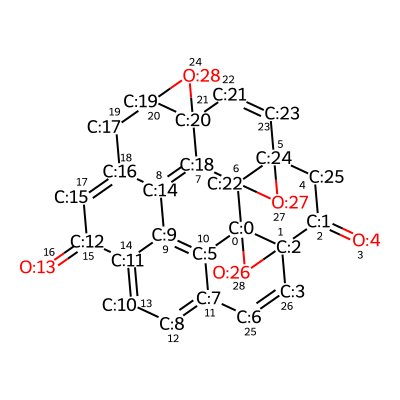

In [13]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

#### View data statistics

In [14]:
carbons = 0
features = np.zeros([3, 3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6:
            carbons += 1
            if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 0, 0, 0] += 1
                        else:
                            features[0, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 0, 1, 0] += 1
                        else:
                            features[0, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 1, 0, 0] += 1
                        else:
                            features[0, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 1, 1, 0] += 1
                        else:
                            features[0, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 2, 0, 0] += 1
                        else:
                            features[0, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 2, 1, 0] += 1
                        else:
                            features[0, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 0, 0, 0] += 1
                        else:
                            features[1, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 0, 1, 0] += 1
                        else:
                            features[1, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 1, 0, 0] += 1
                        else:
                            features[1, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 1, 1, 0] += 1
                        else:
                            features[1, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 2, 0, 0] += 1
                        else:
                            features[1, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 2, 1, 0] += 1
                        else:
                            features[1, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 0, 0, 0] += 1
                        else:
                            features[2, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 0, 1, 0] += 1
                        else:
                            features[2, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 1, 0, 0] += 1
                        else:
                            features[2, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 1, 1, 0] += 1
                        else:
                            features[2, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 2, 0, 0] += 1
                        else:
                            features[2, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 2, 1, 0] += 1
                        else:
                            features[2, 2, 1, 1] += 1


In [15]:
print(f'Total number of carbons = {carbons}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, 0, :, :])}')
print(f'1 Hs = {np.sum(features[:, 1, :, :])}')
print(f'2 Hs = {np.sum(features[:, 2, :, :])}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP = {np.sum(features[0, :, :, :])}')
print(f'SP2 = {np.sum(features[1, :, :, :])}')
print(f'SP3 = {np.sum(features[2, :, :, :])}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, 0, :])}')
print(f'False = {np.sum(features[:, :, 1, :])}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, 0])}')
print(f'False = {np.sum(features[:, :, :, 1])}')
print('')
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0], features[0, 0, 0, 1]],
     ['Non Aromatic', features[0, 0, 1, 0], features[0, 0, 1, 1]]],
     headers=['SP OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0], features[1, 0, 0, 1]],
     ['Non Aromatic', features[1, 0, 1, 0], features[1, 0, 1, 1]]],
     headers=['SP2 OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0], features[1, 1, 0, 1]],
     ['Non Aromatic', features[1, 1, 1, 0], features[1, 1, 1, 1]]],
     headers=['SP2 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0], features[2, 0, 0, 1]],
     ['Non Aromatic', features[2, 0, 1, 0], features[2, 0, 1, 1]]],
     headers=['SP3 0H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 1, 1, 0], features[2, 1, 1, 1]]],
     headers=['SP3 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 2, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 2, 1, 0], features[2, 2, 1, 1]]],
     headers=['SP3 2H', 'Ring', 'Not Ring']
))

Total number of carbons = 7946
---
Number of hydrogens bonded to carbon:
0 Hs = 4513.0
1 Hs = 3147.0
2 Hs = 286.0
---
Hybridisation of carbon:
SP = 1.0
SP2 = 6257.0
SP3 = 1688.0
---
Numer of aromatic carbons:
True = 3698.0
False = 4248.0
---
Is carbon in a ring:
True = 7656.0
False = 290.0

SP OH           Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic       1           0

SP2 OH          Ring    Not Ring
------------  ------  ----------
Aromatic        2613           0
Non Aromatic    1067         172

SP2 1H          Ring    Not Ring
------------  ------  ----------
Aromatic        1085           0
Non Aromatic    1202         118

SP3 0H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     660           0

SP3 1H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     742           0

SP3 2H          Ring    Not Ring
----------

In [16]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [17]:
print(f'Total number of bonds = {bonds}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :])}')
print(f'Double = {np.sum(b_features[1, :, :])}')
print(f'Aromatic = {np.sum(b_features[2, :, :])}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :])}')
print(f'False = {np.sum(b_features[:, 1, :])}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0])}')
print(f'False = {np.sum(b_features[:, :, 1])}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 11959
---
Number of types of bond:
Single = 6152.0
Double = 1584.0
Aromatic = 4223.0
---
Is bond conjugated:
True = 7419.0
False = 4540.0
---
Is bond in a ring:
True = 10596.0
False = 1363.0

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1054         671
Non Conjugated    4197         230
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated        1046         425
Non Conjugated      76          37
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        4223           0
Non Conjugated       0           0


In [18]:
import collections

test_dict = collections.defaultdict(list)

for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    mol = Chem.AddHs(mol)
    # Search through all atoms in molecule
    for atom in mol.GetAtoms():
        # Identify all carbons in molecule
        if atom.GetAtomicNum() == 6:
            # Look at the neighbouring atoms of carbon
            c_neigh = atom.GetNeighbors()
            # Identify carbons bonded to an oxygen
            for cn in c_neigh:
                if cn.GetAtomicNum() == 8:
                    # Get neighbours of the oxygen
                    o_neigh = cn.GetNeighbors()
                    # Look through o neighbours and idetify if bonded to H
                    for on in o_neigh:
                        if on.GetAtomicNum() == 1:
                            test_dict[i].append(atom.GetIdx())
    

#### Correct molecule indexing in data

In [19]:
new_dict = {}

In [20]:
# Loop over all the molecule
for name in ids:
    # Create a dictionary for each molecule
    new_dict[name] = {}
    # Use RDKit to read the SMILES and create a mol variable
    mol = Chem.MolFromSmiles(dict[0][name])
    # Create a temporary dictionary to contain the atomMapNumbers
    map_num = {}
    # Loop over all atoms in molecule
    for atom in mol.GetAtoms():
        # Create dictionary linking mapnumber to atom data
        map_num[atom.GetAtomMapNum()] = atom
    # Sort the dictioanry in numerical order
    sort_map = sorted(map_num)
    # Create variable to count the number of oxygens
    o_count = 0
    # Loop over all atoms in the molecule with respect to the MapNumber
    for num in sort_map:
        # If the atom is an oxygen, count 1
        if map_num[num].GetAtomicNum() == 8:
            o_count += 1
        # If the atom is a carbon
        elif map_num[num].GetAtomicNum() == 6:
            # Get the RDkit atom index
            rd_idx = map_num[num].GetIdx()
            # Get index of spectra in the dictionary
            # by taking into account any oxygens
            new_map = num - o_count
        # Get the spectrum data
        spec = dict[1][name][str(new_map)]
        # Add spectrum to new dictionary with RDKit index
        new_dict[name][str(rd_idx)] = spec

In [21]:
data = []

data.append(dict[0])
data.append(new_dict)

In [45]:
with open('raw/data_coronene_4sets_0.6_new.json', 'w') as f:
    json.dump(data, f)

##### Check new data indexing

In [25]:
# Search data to find name of molecule from given SMILES
smi = '[C:0]123[C:2]4([C:1](=[O:4])[CH2:25][C:24]56[C:22]1([C:18]1=[C:14]7[c:9]8[c:5]2[c:7]([cH:8][cH:10][c:11]8[C:12](=[O:13])[CH:15]=[C:16]7[CH2:17][CH:19]2[C:20]1([CH:21]=[CH:23]5)[O:28]2)[CH:6]=[CH:3]4)[O:27]6)[O:26]3'
mol_name = list(data[0].keys())[list(data[0].values()).index(smi)]

#mol_name = ids[10]
print(mol_name)

R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_0_eKETO_2_iOH_0_iEPOXY_2_ieEPOXY_1_1


In [26]:
# View all the atom keys for molecule
data[1][mol_name].keys()

dict_keys(['0', '2', '1', '26', '10', '25', '11', '12', '9', '13', '14', '15', '8', '17', '18', '19', '7', '20', '21', '22', '6', '23', '5', '4'])

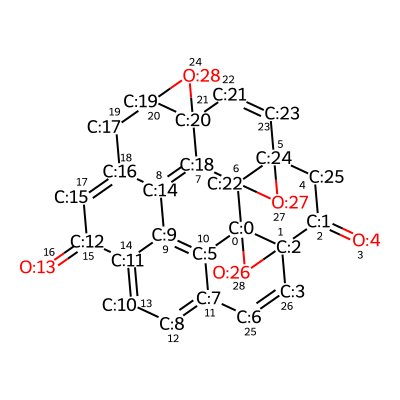

In [27]:
mol = Chem.MolFromSmiles(data[0][mol_name])
mol

<function matplotlib.pyplot.show(close=None, block=None)>

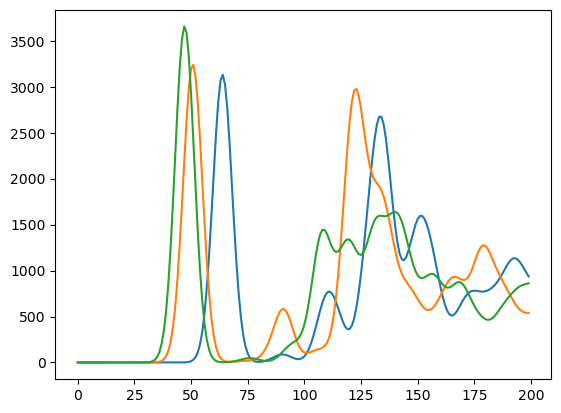

In [54]:
#for x in d_num:
# C=C
#plt.plot(data[1][mol_name]['17'])
#plt.plot(data[1][mol_name]['18'])
# C-OH
plt.plot(data[1][mol_name]['1'])
plt.plot(data[1][mol_name]['6'])
plt.plot(data[1][mol_name]['9'])
plt.show


In [13]:
# Plot all CH2 groups
x = np.linspace(280, 300, 200)

plots = []
for i in range(24):
    p = figure()
    glyphs = [p.line(x, spec[str(i)])]
    plots.append(p)


grid = gridplot(
    [plots[3], plots[0], plots[1], plots[12],
     plots[15], plots[2], plots[5], plots[13],
     plots[16], plots[4], plots[7], plots[17],
     None, plots[6], plots[9], plots[18],
     None, plots[8], plots[11], None,
     None, plots[10], plots[19], None,
     None, plots[14], plots[21], None,
     None, plots[20], plots[23], None,
     None, plots[22], None, None], 
    ncols=4, width=300, height=300
)

show(grid)

### Circumcoronene

#### Load Data

In [7]:
# Load data from json file into dictionary
with open('raw/data_circumcoronene.json', 'rb') as file:
    dict = json.load(file)

In [8]:
# Get the name IDs for all molecules
ids = list(dict[0].keys())
# First molecule name ID in list
name = ids[26]
print(name)

cir_R_eOH_0_eCOOH__1_eEPOXY_0_eCHO_2_eKETO_0_iOH_0_iEPOXY_0_ieEPOXY_0_2


In [9]:
# dict[0] contains the SMILES for the molecule
print(dict[0][name])

[c:0]12[c:1]3[c:2]4[c:3]([cH:4][cH:5]1)[cH:38][c:39]1[c:40]5[c:9]4[c:8]4[c:7]6[c:6]3[c:24]3[c:23]([cH:31][c:32]([CH:56]=[O:60])[c:33]7[c:25]3[c:26]3[c:10]6[c:11]6[c:12]8[c:13]4[c:42]4[c:41]5[c:49]([cH:48][cH:47]1)[cH:50][c:51]1[c:43]4[c:44]4[c:17]8[c:16]5[c:15]8[c:14]6[c:28]6[c:27]3[C:35]([CH:55]=[O:59])([CH2:34]7)[CH:36]=[C:37]([C:54](=[O:57])[OH:58])[c:29]6[cH:30][c:18]8[cH:19][cH:20][c:21]5[CH2:46][c:45]4[cH:53][cH:52]1)[CH2:22]2 |(-0.125626,1.29713,-0.0626348;1.12389,0.63149,-0.0331809;1.15413,-0.803339,-0.0255299;-0.0771697,-1.55141,-0.0345487;-1.30753,-0.843487,-0.0467495;-1.32179,0.547622,-0.0618913;-0.0318361,-2.97396,-0.0327313;1.17548,-3.67014,-0.0302606;2.42157,-2.93108,-0.0240915;2.40381,-1.49978,-0.0156426;3.63728,-0.764697,-0.000355471;3.6075,0.680025,0.0248797;2.37377,1.37271,0.00159144;2.35137,2.81836,0.0764308;1.10731,3.52186,0.0905472;1.10593,4.8965,0.280449;2.30504,5.62803,0.455004;2.16855,7.08964,0.689254;1.09289,7.6698,0.759177;3.54811,4.96418,0.396775;3.57699,3.55

In [10]:
# dict[1] contains all the individual atomic spectra
spec = dict[1][name]
# with each key being the atom index
print(spec.keys())

dict_keys(['53', '9', '20', '51', '10', '55', '36', '58', '26', '43', '23', '39', '8', '30', '4', '49', '14', '12', '46', '19', '15', '45', '40', '59', '34', '41', '60', '47', '18', '29', '11', '57', '7', '25', '35', '33', '44', '42', '31', '48', '37', '38', '24', '50', '28', '6', '13', '54', '16', '52', '17', '5', '21', '56', '27', '22', '32'])


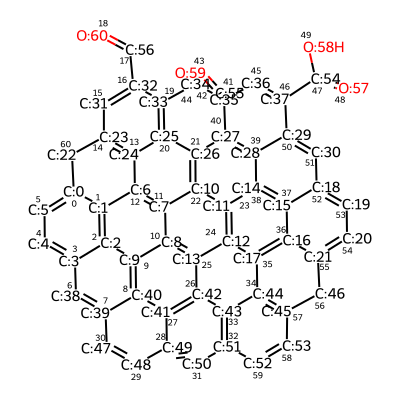

In [11]:
IPythonConsole.drawOptions.addAtomIndices=True
IPythonConsole.drawOptions.annotationFontScale=0.6
IPythonConsole.molSize = 400,400
# Show the molecule with RDKit
mol = Chem.MolFromSmiles(dict[0][name])
mol

#### View data statistics

In [12]:
carbons = 0
features = np.zeros([3, 3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() == 6:
            carbons += 1
            if atom.GetHybridization() == Chem.rdchem.HybridizationType.SP:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 0, 0, 0] += 1
                        else:
                            features[0, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 0, 1, 0] += 1
                        else:
                            features[0, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 1, 0, 0] += 1
                        else:
                            features[0, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 1, 1, 0] += 1
                        else:
                            features[0, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[0, 2, 0, 0] += 1
                        else:
                            features[0, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[0, 2, 1, 0] += 1
                        else:
                            features[0, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP2:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 0, 0, 0] += 1
                        else:
                            features[1, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 0, 1, 0] += 1
                        else:
                            features[1, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 1, 0, 0] += 1
                        else:
                            features[1, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 1, 1, 0] += 1
                        else:
                            features[1, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[1, 2, 0, 0] += 1
                        else:
                            features[1, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[1, 2, 1, 0] += 1
                        else:
                            features[1, 2, 1, 1] += 1
            elif atom.GetHybridization() == Chem.rdchem.HybridizationType.SP3:
                if atom.GetTotalNumHs() == 0:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 0, 0, 0] += 1
                        else:
                            features[2, 0, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 0, 1, 0] += 1
                        else:
                            features[2, 0, 1, 1] += 1
                elif atom.GetTotalNumHs() == 1:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 1, 0, 0] += 1
                        else:
                            features[2, 1, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 1, 1, 0] += 1
                        else:
                            features[2, 1, 1, 1] += 1
                elif atom.GetTotalNumHs() == 2:
                    if atom.GetIsAromatic():
                        if atom.IsInRing():
                            features[2, 2, 0, 0] += 1
                        else:
                            features[2, 2, 0, 1] += 1
                    else:
                        if atom.IsInRing():
                            features[2, 2, 1, 0] += 1
                        else:
                            features[2, 2, 1, 1] += 1

In [13]:
print(f'Total number of carbons = {carbons}')
print('---')
print('Number of hydrogens bonded to carbon:')
print(f'0 Hs = {np.sum(features[:, 0, :, :])}')
print(f'1 Hs = {np.sum(features[:, 1, :, :])}')
print(f'2 Hs = {np.sum(features[:, 2, :, :])}')
print('---')
print('Hybridisation of carbon:') 
print(f'SP = {np.sum(features[0, :, :, :])}')
print(f'SP2 = {np.sum(features[1, :, :, :])}')
print(f'SP3 = {np.sum(features[2, :, :, :])}')
print('---')
print('Numer of aromatic carbons:')
print(f'True = {np.sum(features[:, :, 0, :])}')
print(f'False = {np.sum(features[:, :, 1, :])}')
print('---')
print('Is carbon in a ring:')
print(f'True = {np.sum(features[:, :, :, 0])}')
print(f'False = {np.sum(features[:, :, :, 1])}')
print('')
print(tabulate(
    [['Aromatic', features[0, 0, 0, 0], features[0, 0, 0, 1]],
     ['Non Aromatic', features[0, 0, 1, 0], features[0, 0, 1, 1]]],
     headers=['SP OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 0, 0, 0], features[1, 0, 0, 1]],
     ['Non Aromatic', features[1, 0, 1, 0], features[1, 0, 1, 1]]],
     headers=['SP2 OH', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[1, 1, 0, 0], features[1, 1, 0, 1]],
     ['Non Aromatic', features[1, 1, 1, 0], features[1, 1, 1, 1]]],
     headers=['SP2 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 0, 0, 0], features[2, 0, 0, 1]],
     ['Non Aromatic', features[2, 0, 1, 0], features[2, 0, 1, 1]]],
     headers=['SP3 0H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 1, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 1, 1, 0], features[2, 1, 1, 1]]],
     headers=['SP3 1H', 'Ring', 'Not Ring']
))
print('')
print(tabulate(
    [['Aromatic', features[2, 2, 0, 0], features[2, 2, 0, 1]],
     ['Non Aromatic', features[2, 2, 1, 0], features[2, 2, 1, 1]]],
     headers=['SP3 2H', 'Ring', 'Not Ring']
))

Total number of carbons = 5035
---
Number of hydrogens bonded to carbon:
0 Hs = 3512.0
1 Hs = 1436.0
2 Hs = 87.0
---
Hybridisation of carbon:
SP = 0.0
SP2 = 4601.0
SP3 = 434.0
---
Numer of aromatic carbons:
True = 3962.0
False = 1073.0
---
Is carbon in a ring:
True = 4914.0
False = 121.0

SP OH           Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic       0           0

SP2 OH          Ring    Not Ring
------------  ------  ----------
Aromatic        3029           0
Non Aromatic     224          70

SP2 1H          Ring    Not Ring
------------  ------  ----------
Aromatic         933           0
Non Aromatic     294          51

SP3 0H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     189           0

SP3 1H          Ring    Not Ring
------------  ------  ----------
Aromatic           0           0
Non Aromatic     158           0

SP3 2H          Ring    Not Ring
------------

In [14]:
bonds = 0
b_features = np.zeros([3, 2, 2])

# Loop through all molecules in datasets
for i in ids:
    smiles = dict[0][i]
    mol = Chem.MolFromSmiles(smiles)
    # Loop through all bonds in molecule
    for bond in mol.GetBonds():
        bonds += 1
        # Count the types of bond
        if bond.GetBondType() == Chem.rdchem.BondType.SINGLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[0, 0, 0] += 1
                else:
                    b_features[0, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[0, 1, 0] += 1
                else:
                    b_features[0, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[1, 0, 0] += 1
                else:
                    b_features[1, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[1, 1, 0] += 1
                else:
                    b_features[1, 1, 1] += 1
        elif bond.GetBondType() == Chem.rdchem.BondType.AROMATIC:
            if bond.GetIsConjugated():
                if bond.IsInRing():
                    b_features[2, 0, 0] += 1
                else:
                    b_features[2, 0, 1] += 1
            else:
                if bond.IsInRing():
                    b_features[2, 1, 0] += 1
                else:
                    b_features[2, 1, 1] += 1


In [15]:
print(f'Total number of bonds = {bonds}')
print('---')
print('Number of types of bond:')
print(f'Single = {np.sum(b_features[0, :, :])}')
print(f'Double = {np.sum(b_features[1, :, :])}')
print(f'Aromatic = {np.sum(b_features[2, :, :])}')
print('---')
print('Is bond conjugated:')
print(f'True = {np.sum(b_features[:, 0, :])}')
print(f'False = {np.sum(b_features[:, 1, :])}')
print('---')
print('Is bond in a ring:')
print(f'True = {np.sum(b_features[:, :, 0])}')
print(f'False = {np.sum(b_features[:, :, 1])}')
print('')
print(tabulate(
    [['Conjugated', b_features[0, 0, 0], b_features[0, 0, 1]],
     ['Non Conjugated', b_features[0, 1, 0], b_features[0, 1, 1]]],
     headers=['SINGLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[1, 0, 0], b_features[1, 0, 1]],
     ['Non Conjugated', b_features[1, 1, 0], b_features[1, 1, 1]]],
     headers=['DOUBLE', 'Ring', 'Not Ring']
))
print(' ')
print(tabulate(
    [['Conjugated', b_features[2, 0, 0], b_features[2, 0, 1]],
     ['Non Conjugated', b_features[2, 1, 0], b_features[2, 1, 1]]],
     headers=['AROMATIC', 'Ring', 'Not Ring']
))

Total number of bonds = 7265
---
Number of types of bond:
Single = 1718.0
Double = 470.0
Aromatic = 5077.0
---
Is bond conjugated:
True = 6048.0
False = 1217.0
---
Is bond in a ring:
True = 6828.0
False = 437.0

SINGLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         300         208
Non Conjugated    1158          52
 
DOUBLE            Ring    Not Ring
--------------  ------  ----------
Conjugated         291         172
Non Conjugated       2           5
 
AROMATIC          Ring    Not Ring
--------------  ------  ----------
Conjugated        5077           0
Non Conjugated       0           0


#### Correct molecule indexing

In [16]:
new_dict = {}

In [17]:
# Loop over all the molecule
for name in ids:
    print(name)
    # Create a dictionary for each molecule
    new_dict[name] = {}
    # Use RDKit to read the SMILES and create a mol variable
    mol = Chem.MolFromSmiles(dict[0][name])
    # Create a temporary dictionary to contain the atomMapNumbers
    map_num = {}
    # Loop over all atoms in molecule
    for atom in mol.GetAtoms():
        # Create dictionary linking mapnumber to atom data
        map_num[atom.GetAtomMapNum()] = atom
    # Sort the dictionary in numerical order
    sort_map = sorted(map_num)
    # Create variable to count the number of oxygens
    o_count = 0
    # Loop over all atoms in the molecule with respect to the MapNumber
    for num in sort_map:
        # If the atom is an oxygen, count 1
        if map_num[num].GetAtomicNum() == 8:
            o_count += 1
        # If the atom is a carbon
        elif map_num[num].GetAtomicNum() == 6:
            # Get the RDkit atom index
            rd_idx = map_num[num].GetIdx()
            # Get index of spectra in the dictionary
            # by taking into account any oxygens
            new_map = num - o_count
        # Get the spectrum data
        spec = dict[1][name][str(new_map)]
        # Add spectrum to new dictionary with RDKit index
        new_dict[name][str(rd_idx)] = spec

cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_2_eKETO_0_iOH_1_iEPOXY_0_ieEPOXY_2_2


KeyError: '0'

In [18]:
dict[1]['cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_2_eKETO_0_iOH_1_iEPOXY_0_ieEPOXY_2_2'].keys()

dict_keys(['53', '9', '20', '51', '10', '55', '36', '58', '26', '43', '23', '39', '8', '30', '49', '14', '12', '46', '19', '15', '45', '40', '59', '34', '41', '60', '47', '18', '29', '11', '57', '7', '25', '35', '33', '44', '42', '31', '48', '37', '38', '24', '50', '28', '6', '13', '54', '16', '52', '17', '5', '21', '56', '27', '22', '32'])

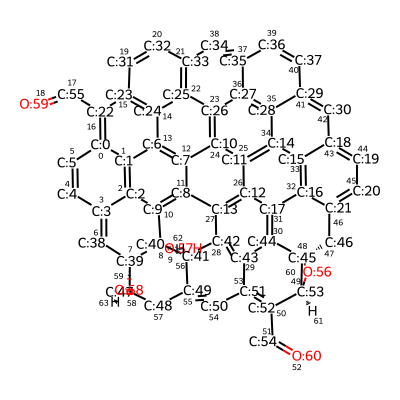

In [19]:
mol = Chem.MolFromSmiles(dict[0]['cir_R_eOH_0_eCOOH__0_eEPOXY_0_eCHO_2_eKETO_0_iOH_1_iEPOXY_0_ieEPOXY_2_2'])
mol

In [ ]:
data = []

data.append(dict[0])
data.append(new_dict)

In [ ]:
with open('raw/data_coronene_4sets_0.6_new.json', 'w') as f:
    json.dump(data, f)